### Module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration.

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
pwd

'/home/dhatri/Time Series'

In [3]:
cd ..

/home/dhatri


In [4]:
cd Documents/UDEMY_TSA_FINAL/Data/

/home/dhatri/Documents/UDEMY_TSA_FINAL/Data


In [5]:
df = pd.read_csv('macrodata.csv', index_col=0, parse_dates=True)

In [7]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


<Axes: >

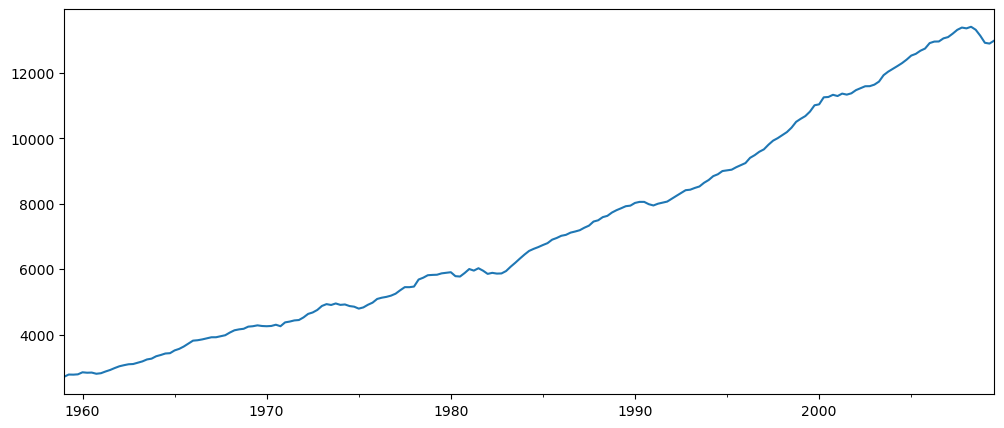

In [8]:
df['realgdp'].plot(figsize=(12,5))

In [9]:
from statsmodels.tsa.filters.hp_filter import hpfilter

In [11]:
gdp_cycle, gdp_trend = hpfilter(df['realgdp'],lamb=1600)

In [12]:
gdp_trend

1959-03-31     2670.837085
1959-06-30     2698.712468
1959-09-30     2726.612545
1959-12-31     2754.612067
1960-03-31     2782.816333
                  ...     
2008-09-30    13222.581545
2008-12-31    13249.189472
2009-03-31    13274.457706
2009-06-30    13299.061073
2009-09-30    13323.456243
Name: realgdp_trend, Length: 203, dtype: float64

<Axes: >

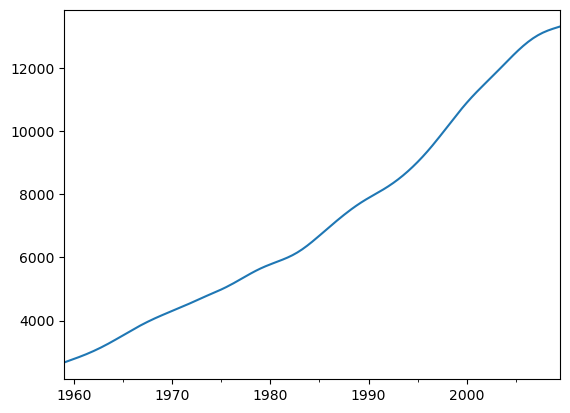

In [14]:
gdp_trend.plot()

In [15]:
df['trend'] = gdp_trend

<Axes: >

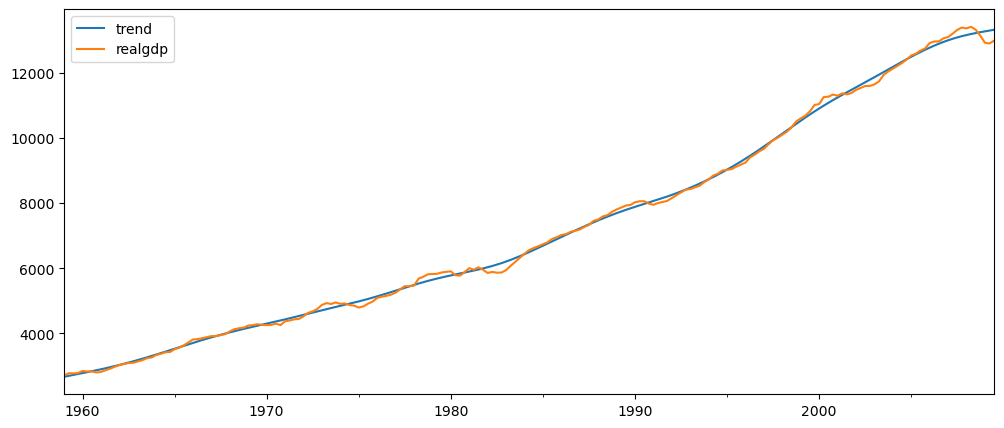

In [17]:
df[['trend', 'realgdp']].plot(figsize=(12, 5))
# this basically shows us where the real gdp is sort of below or above the trend

<Axes: >

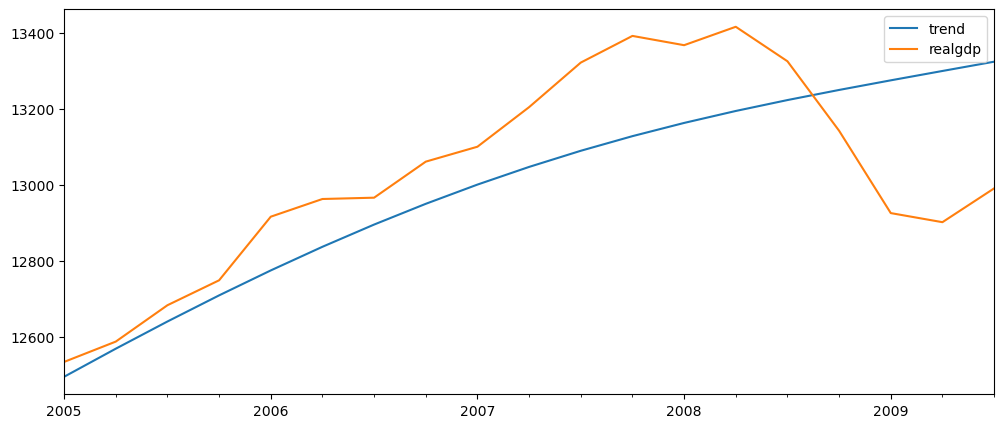

In [22]:
df[['trend', 'realgdp']]['2005-01-01':].plot(figsize=(12, 5))

In [23]:
gdp_cycle

1959-03-31     39.511915
1959-06-30     80.088532
1959-09-30     48.875455
1959-12-31     30.591933
1960-03-31     64.882667
                 ...    
2008-09-30    102.018455
2008-12-31   -107.269472
2009-03-31   -349.047706
2009-06-30   -397.557073
2009-09-30   -333.115243
Name: realgdp_cycle, Length: 203, dtype: float64

In [24]:
df['cyclical'] = gdp_cycle

<Axes: >

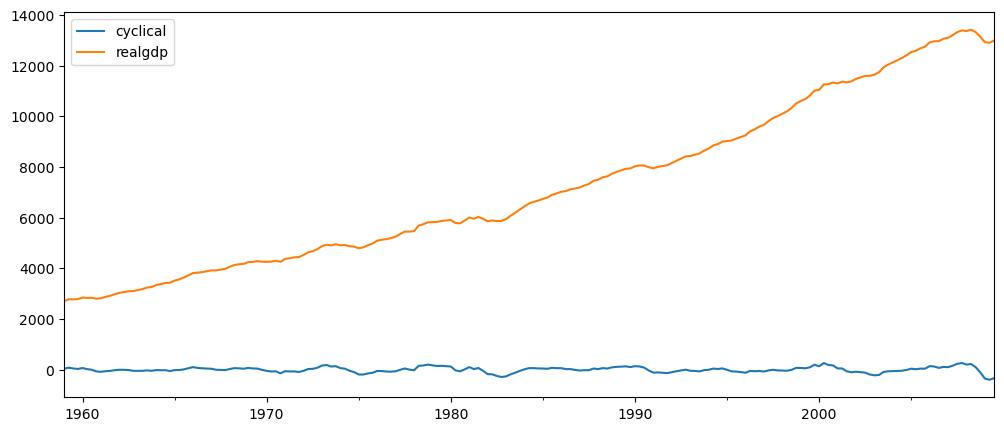

In [26]:
df[['cyclical', 'realgdp']][:].plot(figsize=(12, 5))

In [30]:
airline = pd.read_csv('airline_passengers.csv', index_col='Month', parse_dates=True)

In [33]:
airline.dropna()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


<Axes: xlabel='Month'>

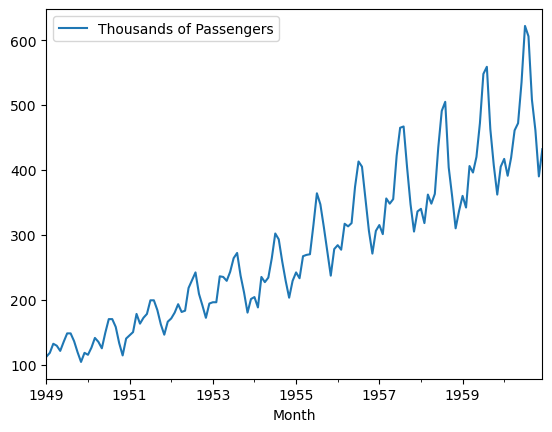

In [34]:
airline.plot()

In [35]:
#since this is increasing at a slightly higher rate then linear,
# we'll use the multiplicative model

In [37]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [38]:
result = seasonal_decompose(airline['Thousands of Passengers'], model='multiplicative')

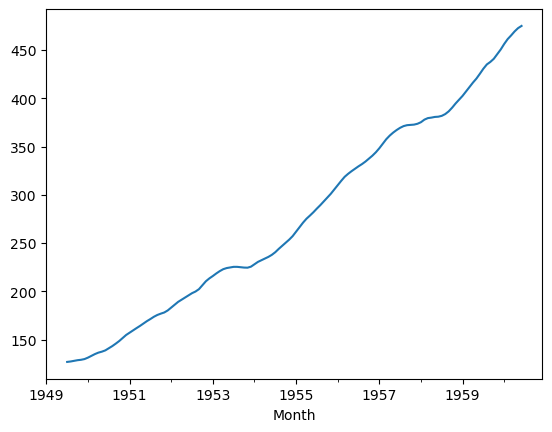

In [42]:
result.trend.plot();

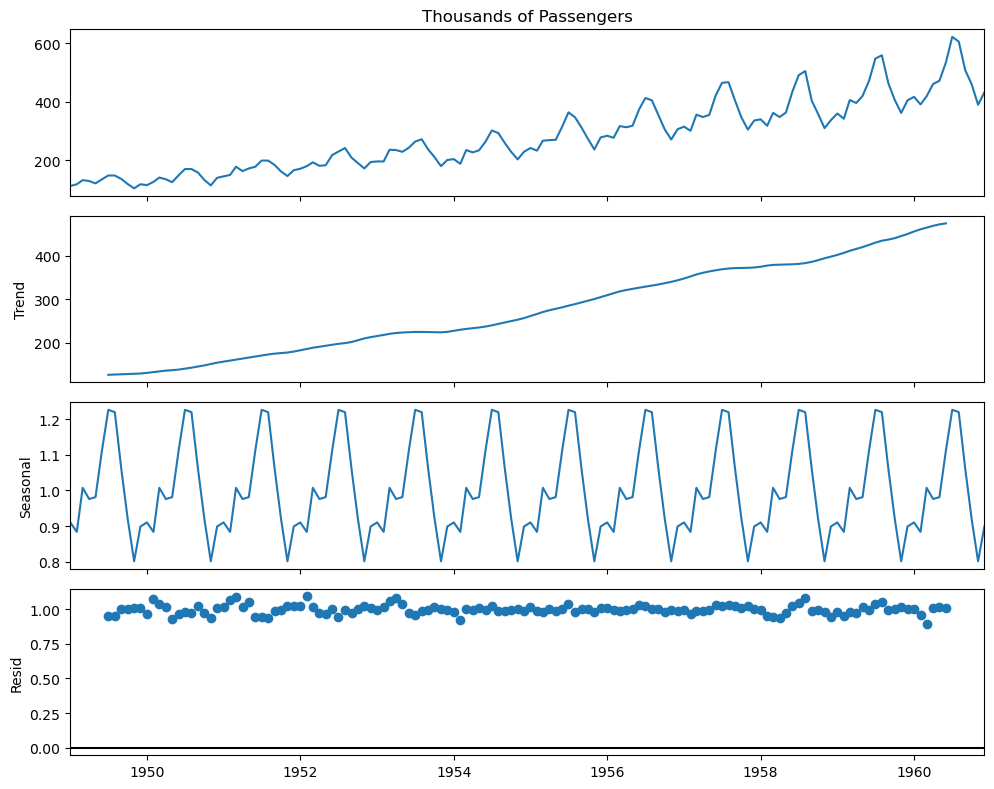

In [56]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 8
result.plot();

<Axes: xlabel='Month'>

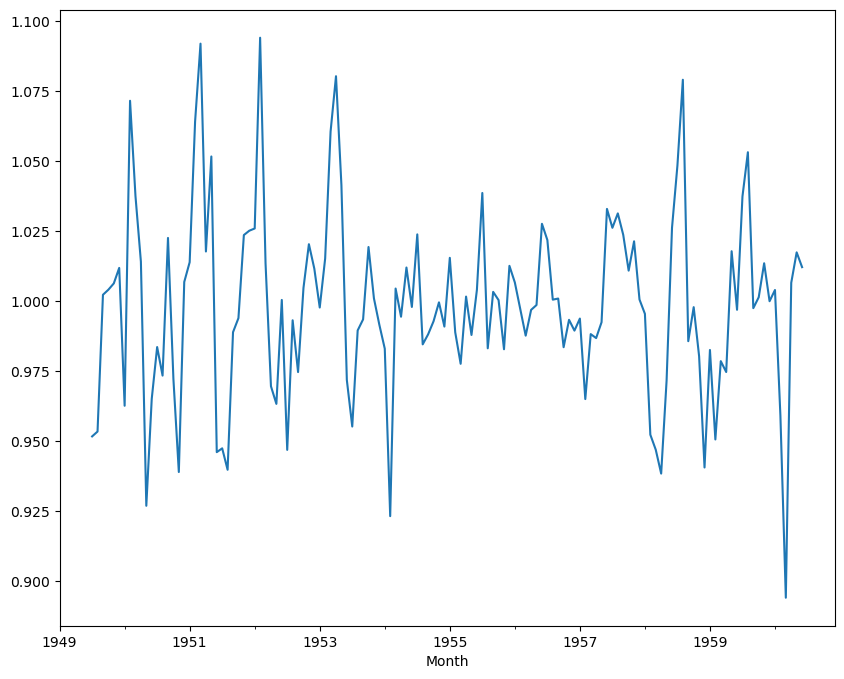

In [57]:
result.resid.plot()

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline

In [59]:
airline

,Thousands of Passengers,6-month-SMA,12-month-SMA
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,NaN,NaN
1949-03-01,132,NaN,NaN
1949-04-01,129,NaN,NaN
1949-05-01,121,NaN,NaN
...,...,...,...
1960-08-01,606,519.166667,463.333333
1960-09-01,508,534.000000,467.083333
1960-10-01,461,534.000000,471.583333


In [60]:
airline.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [61]:
#sma
airline['6-month-SMA'] = airline['Thousands of Passengers'].rolling(window=6).mean()
airline['12-month-SMA'] = airline['Thousands of Passengers'].rolling(window=12).mean()

<Axes: xlabel='Month'>

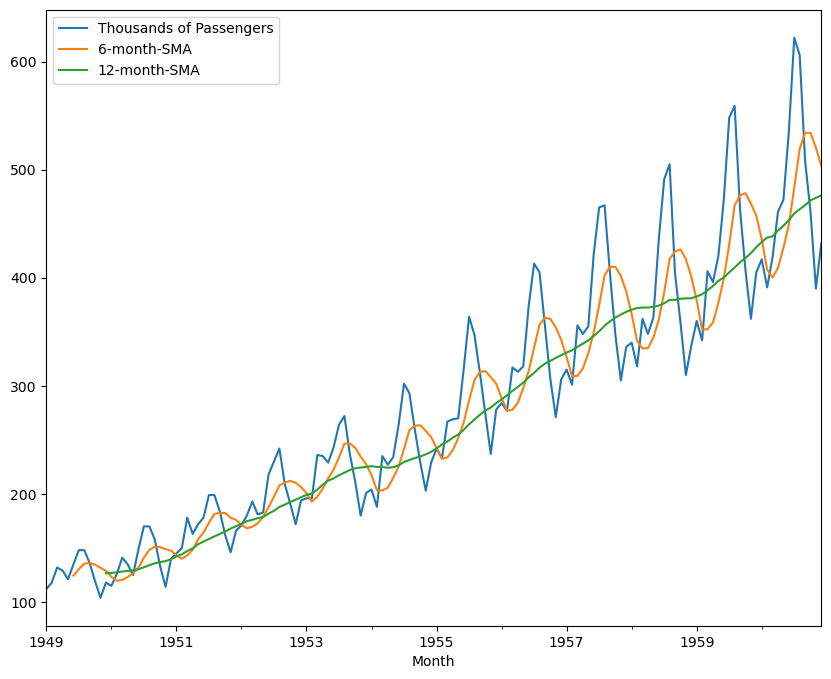

In [62]:
airline.plot()

In [63]:
airline['EWMA-12'] = airline['Thousands of Passengers'].ewm(span=12).mean()

<Axes: xlabel='Month'>

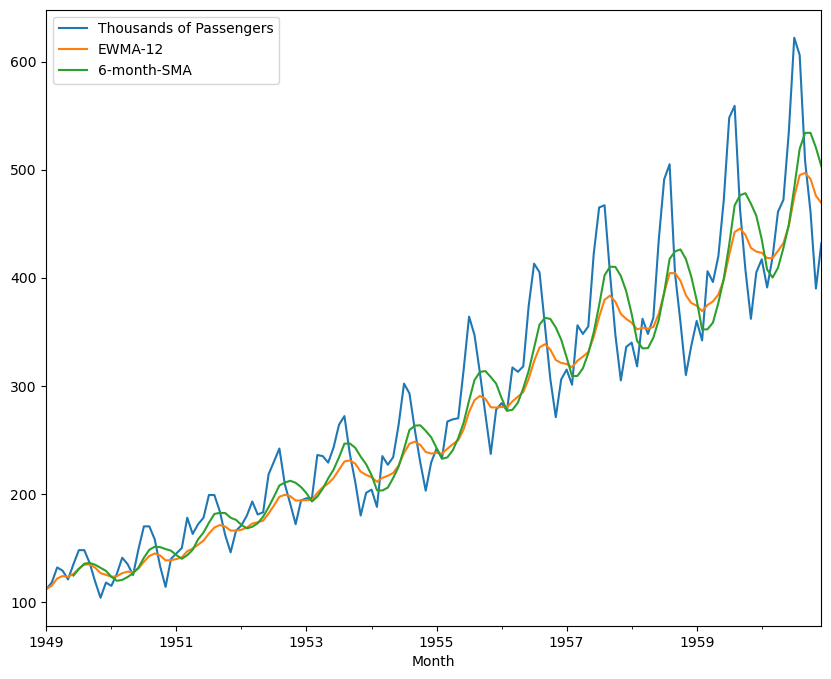

In [66]:
airline[["Thousands of Passengers", "EWMA-12", "6-month-SMA"]].plot()

In [68]:
airline

,Thousands of Passengers,6-month-SMA,12-month-SMA,EWMA-12
Month,,,,
1949-01-01,112,NaN,NaN,112.000000
1949-02-01,118,NaN,NaN,115.250000
1949-03-01,132,NaN,NaN,121.787529
1949-04-01,129,NaN,NaN,124.064224
1949-05-01,121,NaN,NaN,123.231685
...,...,...,...,...
1960-08-01,606,519.166667,463.333333,494.898620
1960-09-01,508,534.000000,467.083333,496.914217
1960-10-01,461,534.000000,471.583333,491.388952


In [76]:
drop_cols = ['6-month-SMA', '12-month-SMA', 'EWMA-12']

In [78]:
airline.drop(drop_cols, inplace=True, axis=1)

In [79]:
airline

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [80]:
airline.dropna()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [81]:
airline.index.freq = 'MS'

In [83]:
airline.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [84]:
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [85]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [86]:
span = 12
alpha = 2 / (span + 1)

In [88]:
airline['EWMA'] = airline['Thousands of Passengers'].ewm(alpha=alpha, adjust=False).mean()

In [89]:
airline.head()

,Thousands of Passengers,EWMA
Month,,
1949-01-01,112,112.000000
1949-02-01,118,112.923077
1949-03-01,132,115.857988
1949-04-01,129,117.879836
1949-05-01,121,118.359861


In [90]:
model = SimpleExpSmoothing(airline['Thousands of Passengers'])

In [97]:
fitted_model = model.fit(smoothing_level = alpha, optimized=False)

In [102]:
airline['SES12'] = fitted_model.fittedvalues.shift(-1) #if we dont do this, the first 
# vale repeats idky ahhhhhhhhhhhhhhhhhhh

<Axes: xlabel='Month'>

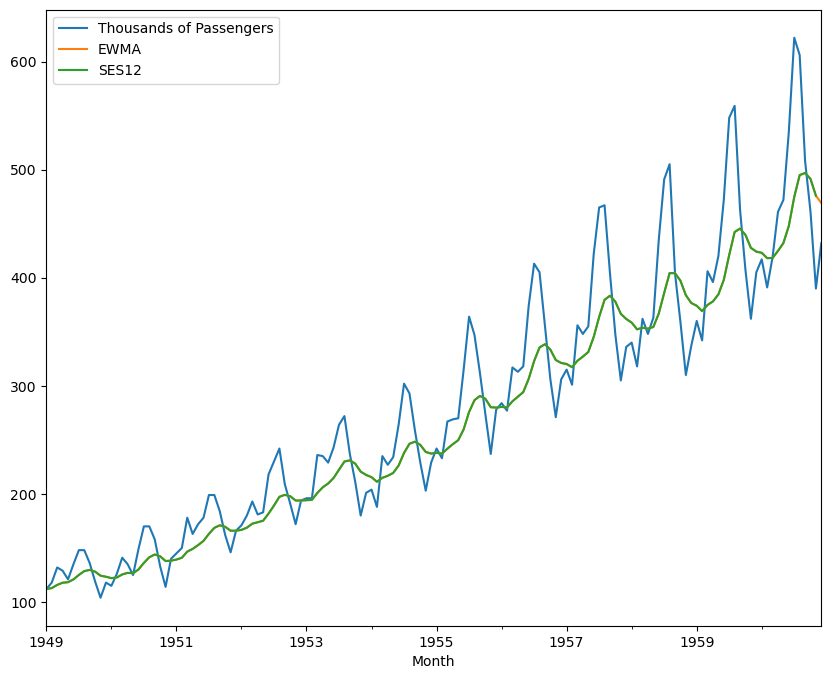

In [106]:
airline.plot() #notice that EWMA and SES12 are overlapping
# cos they are the same

In [107]:
airline.head()

,Thousands of Passengers,EWMA,SES12
Month,,,
1949-01-01,112,112.000000,112.000000
1949-02-01,118,112.923077,112.923077
1949-03-01,132,115.857988,115.857988
1949-04-01,129,117.879836,117.879836
1949-05-01,121,118.359861,118.359861


In [108]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [109]:
airline['DES_add_12'] = ExponentialSmoothing(airline['Thousands of Passengers'], trend='add').fit().fittedvalues.shift(-1)

In [110]:
airline.head()

,Thousands of Passengers,EWMA,SES12,DES_add_12
Month,,,,
1949-01-01,112,112.000000,112.000000,114.102394
1949-02-01,118,112.923077,112.923077,120.040657
1949-03-01,132,115.857988,115.857988,134.001539
1949-04-01,129,117.879836,117.879836,131.085845
1949-05-01,121,118.359861,118.359861,123.110263


<Axes: xlabel='Month'>

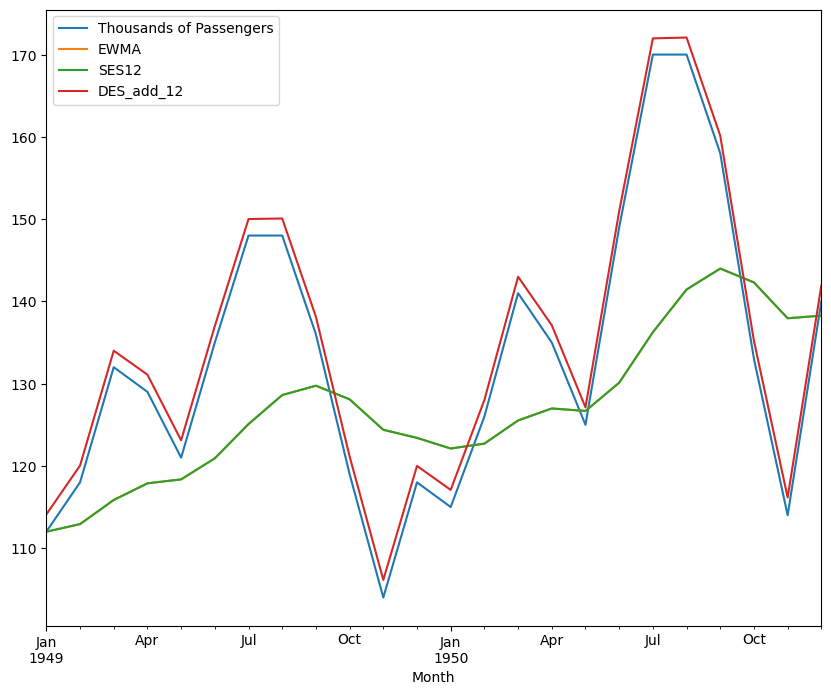

In [112]:
airline.iloc[:24].plot()
#notice that just the addition of one more terms explains the data
# much much better

In [113]:
airline['DES_mul_12'] = ExponentialSmoothing(airline['Thousands of Passengers'], trend='mul').fit().fittedvalues.shift(-1)

<Axes: xlabel='Month'>

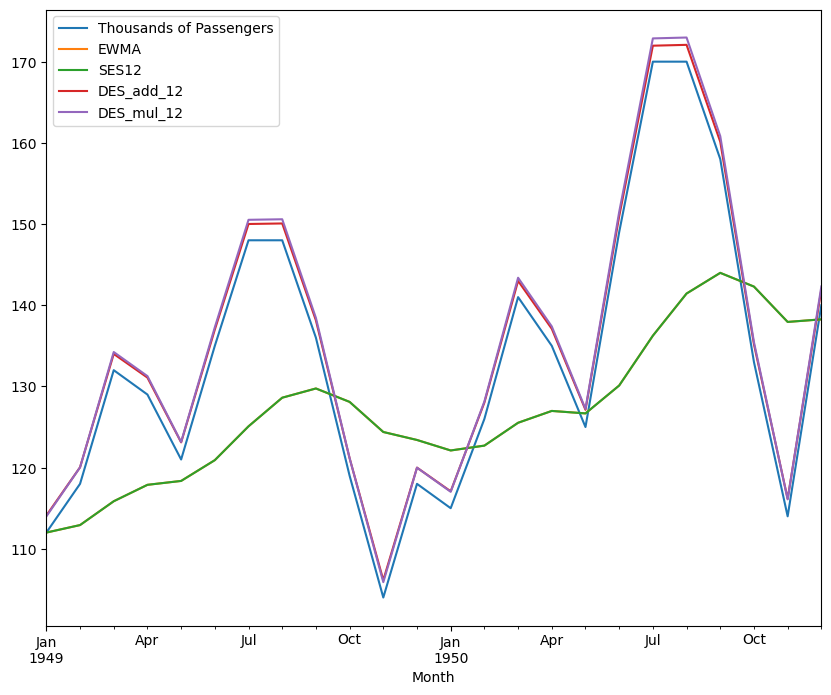

In [114]:
airline.iloc[:24].plot() #notice that the mul model is represening
# the data better

# but this is at the beginning

<Axes: xlabel='Month'>

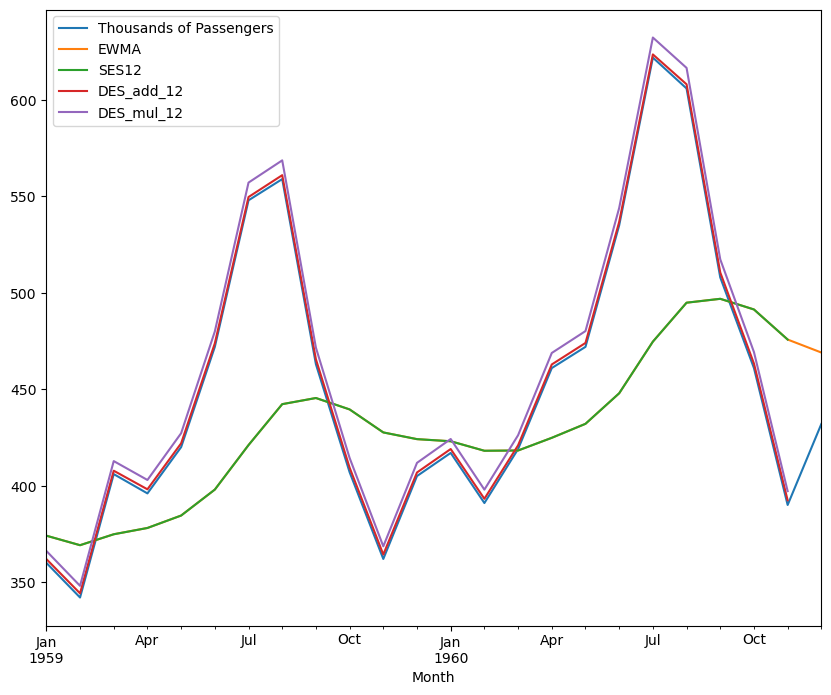

In [116]:
airline.iloc[-24:].plot()

In [119]:
airline['TES_mul_12'] = ExponentialSmoothing(airline['Thousands of Passengers'], trend='mul', seasonal='mul', seasonal_periods=12).fit().fittedvalues.shift(-1)

/home/dhatri/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


<Axes: xlabel='Month'>

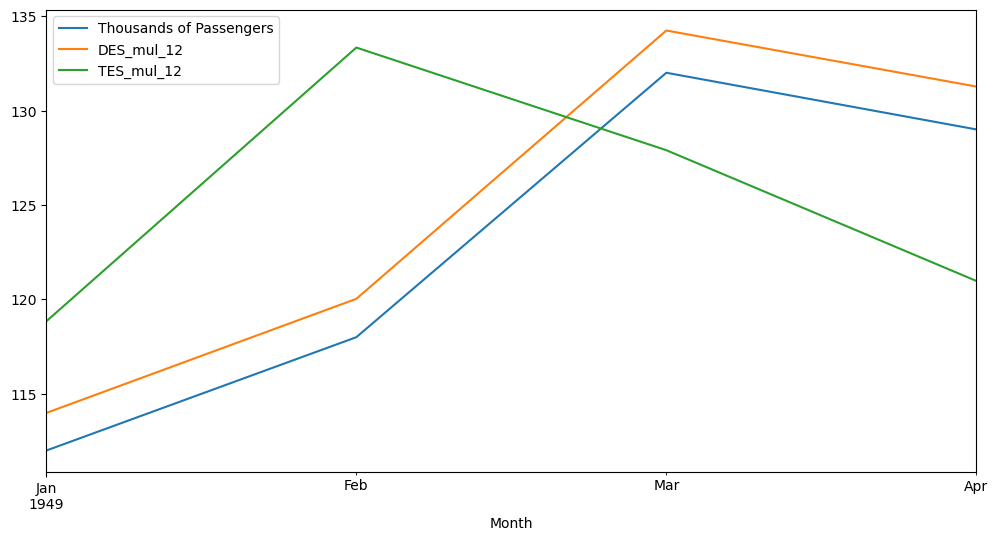

In [126]:
airline[['Thousands of Passengers', 'DES_mul_12', 'TES_mul_12']][:4].plot(figsize=(12, 6))

In [127]:
# tes is actually doing poorly in the beginning

<Axes: xlabel='Month'>

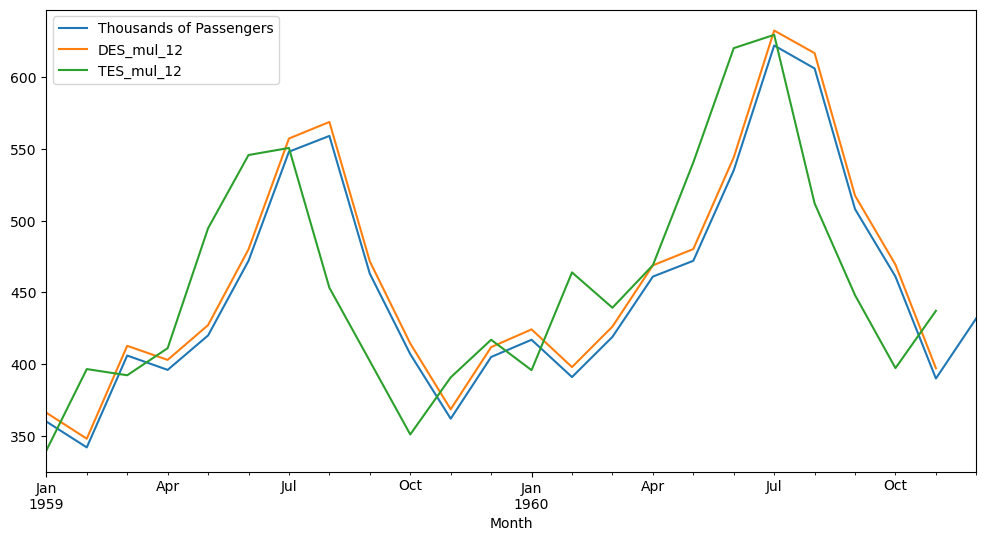

In [129]:
# but towards the end
airline[['Thousands of Passengers', 'DES_mul_12', 'TES_mul_12']].iloc[-24:].plot(figsize=(12, 6))

In [ ]:
# it does better, this is why we use this for forecasting